In [ ]:
#   데이터 수집 => 전처리 => 후보변수 => 유의변수 선택

#   전진선택법
#   후진제거법

In [1]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/data.csv")

df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[0:8]

X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

df["Label"].value_counts()

Label
0    2158
1     445
Name: count, dtype: int64

Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

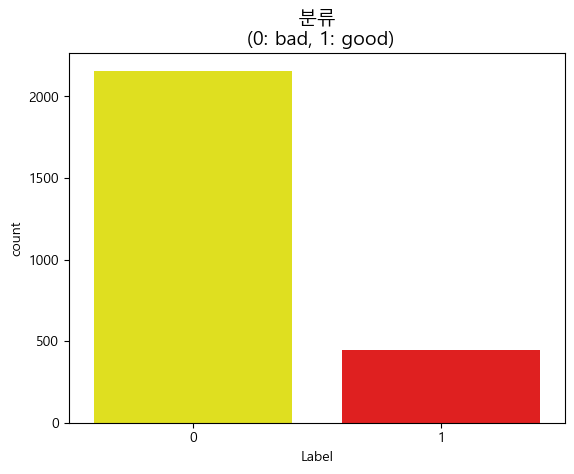

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Label', data=df, palette=colors)

plt.title('분류\n (0: bad, 1: good)', fontsize=14)

#불균형 데이터셋

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

Label
0    445
1    445
Name: count, dtype: int64

In [5]:
X=df_samp[train_cols]
y=df_samp["Label"]

In [6]:
# ! pip install statsmodels

In [7]:
import statsmodels.api as sm

model=sm.Logit(y,X)
#              종속변수, 독립변수
result=model.fit()
#       학습
print(result.summary2())
#       모형 요약

#모델의 설명력 62%
#citations 변수는 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.263067
         Iterations 8
                            Results: Logit
Model:                Logit             Method:            MLE        
Dependent Variable:   Label             Pseudo R-squared:  0.620      
Date:                 2023-07-21 09:20  AIC:               484.2592   
No. Observations:     890               BIC:               522.5889   
Df Model:             7                 Log-Likelihood:    -234.13    
Df Residuals:         882               LL-Null:           -616.90    
Converged:            1.0000            LLR p-value:       5.0478e-161
No. Iterations:       8.0000            Scale:             1.0000     
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0665   0.0155 -4.2972 0.0000 -0.0969 -0.0362
int

In [8]:
#   R-squared(모형의 설명력) : 0.0~1.0 1에 가까울수록 완벽한 모델
#   Coef : 회귀계수         P-value : 유의확률
#   기울기

#   가설 검정
#          반증법   귀무가설(신약 개발, 효과 있다 -> 귀무 : 효과 없다, 대립 : 효과 있다_내 주장)
#                                                                  p-value : 접근유의확률
#                                                                  5%  95% 신뢰수준
#                                                                  0.05 5%

In [9]:
#citations 변수를 제거한 모형

cols=['teaching', 'international', 'research', 'income',
       'num_students', 'student_staff_ratio', 'international_students']

X=df_samp[cols]

model=sm.Logit(y,X)
result=model.fit()

result.summary2()

#양의 상관관계: international_students 외국인학생수, research 연구능력

#음의 상관관계: student_staff_ratio 교수1인당 담당학생수가 적으면 우수한 학교

Optimization terminated successfully.
         Current function value: 0.263068
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Method:            MLE        
Dependent Variable:   Label             Pseudo R-squared:  0.620      
Date:                 2023-07-21 09:20  AIC:               482.2606   
No. Observations:     890               BIC:               515.7991   
Df Model:             6                 Log-Likelihood:    -234.13    
Df Residuals:         883               LL-Null:           -616.90    
Converged:            1.0000            LLR p-value:       4.2846e-162
No. Iterations:       8.0000            Scale:             1.0000     
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0668   0.0139 -4.8183 0.0000 -0.0940 -0.0396
international          -0.0470   0.0081 -5.8316 0.0000 -0.0628 -0.0312
research                0.1928   0.0163 11.8048 0.0000  0.1608  0.2248
income                 -0.0295   0.0059 -5.0230 0.0000 -0.0411 -0.0180
num_students           -0.0000   0.0000 -3.6177 0.0003 -0.0001 -0.0000
student_staff_ratio    -0.1069   0.0169 -6.3162 0.0000 -0.1401 -0.0737
international_students  5.0092   1.7265  2.9015 0.0037  1.6254  8.3930
======================================================================

"""

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
#       작업순서
    ('scaler', StandardScaler()),
#     변수명        모형
    ('clf', LogisticRegression(random_state=0)),
    ])

params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
#    변수명__파라미터
    }

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100}
0.9156770406770406


In [11]:
#다양한 알고리즘별 정확도를 저장할 리스트
scores=[]

In [12]:
scores.append(grid.best_score_)
scores

[0.9156770406770406]

In [13]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),   # 트리모델에서는 스케일러가 효과가 크게 없음
    ('clf', DecisionTreeClassifier(random_state=0)),
    ])

params = {
    'clf__max_depth': list(range(3,6))
    #     가지치기 레벨         3~5
    }

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.7817135317135318


In [14]:
scores.append(grid.best_score_)
scores

[0.9156770406770406, 0.7817135317135318]

In [15]:
tree=grid.best_estimator_['clf']

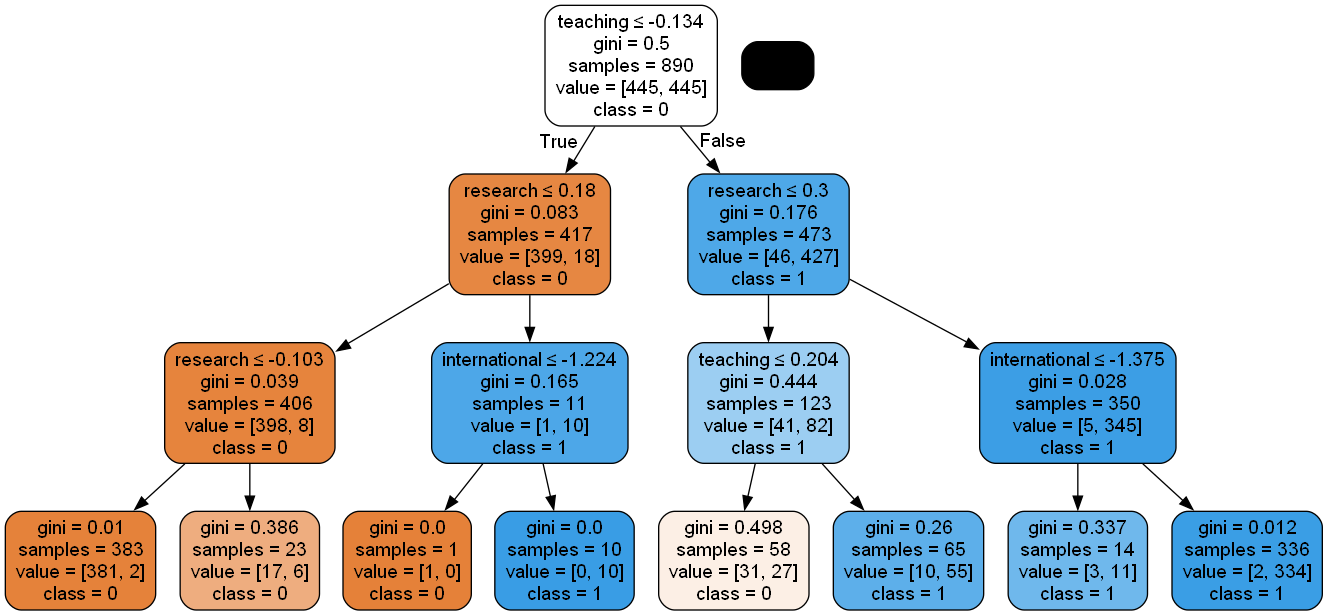

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=cols, class_names=["0","1"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

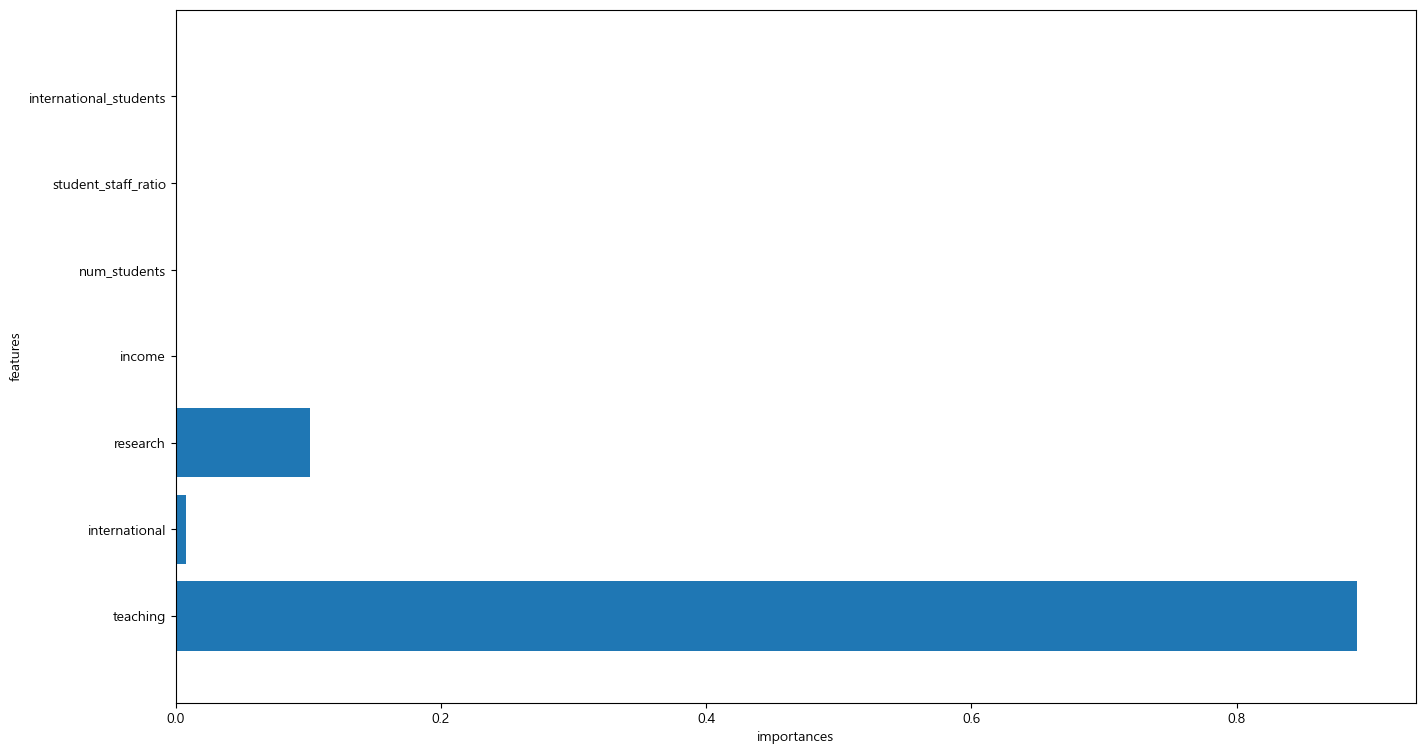

In [17]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]

    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)

    plt.xlabel("importances")
    plt.ylabel("features")

    plt.ylim(-1, n_features)

plot_tree(tree)

#특성 중요도 : teaching > research

In [18]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])

params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10)),
    #   분류모형수              10,20,30,,,,100
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 20}
0.7918259168259167


In [19]:
scores.append(grid.best_score_)
scores

[0.9156770406770406, 0.7817135317135318, 0.7918259168259167]

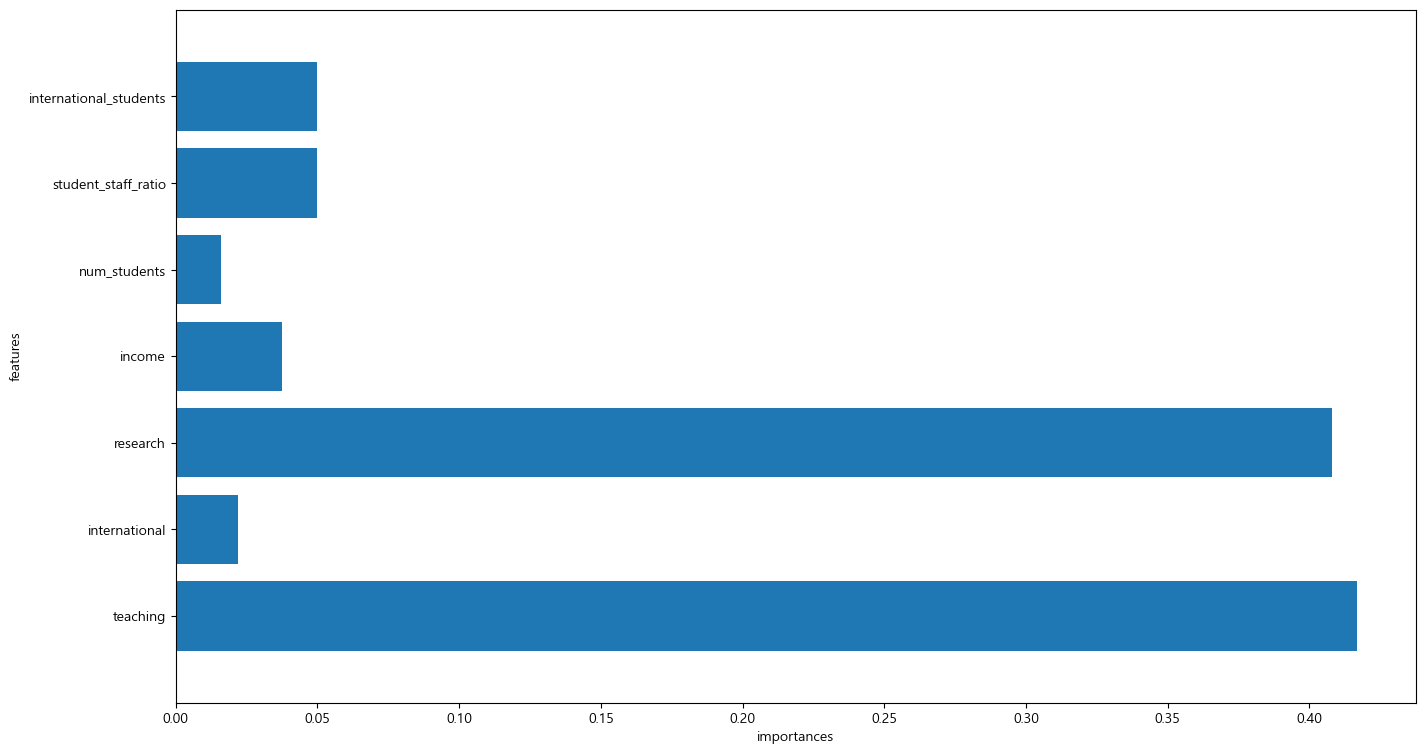

In [20]:
rf=grid.best_estimator_['clf']
plot_tree(rf)
# teaching > research

In [21]:
#knn(사례기반추론)
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])

params = {
       'clf__n_neighbors': list(range(1,11)),
       #    이웃의 수               1~10
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 9}
0.8280401613734947


In [22]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947]

In [23]:
#인공신경망
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=5000)),
])

params = {
        'clf__hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
        'clf__activation': ['tanh', 'relu'],
        'clf__alpha': [0.001, 0.01, 0.1]
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'clf__activation': 'tanh', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.9100539933873266


In [24]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266]

In [25]:
#svm
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])

params = {
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}

grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1000, 'clf__gamma': 0.0001}
0.9111725361725362


In [26]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266,
 0.9111725361725362]

In [27]:
# 신경망
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16,
                             activation="relu",
                             input_shape=(X.shape[1],)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))    

    network.compile(loss='binary_crossentropy',
                    optimizer=optimizer, # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표    
    return network

In [28]:
neural_network = KerasClassifier(model=create_network, verbose=0)

# 하이퍼파라미터 탐색 영역을 정의
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',neural_network)
])

params={
    'clf__epochs': [50, 100],
    'clf__batch_size': [32,64,128],
    'clf__optimizer': ["rmsprop", "adam"],
}

grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)

grid_result = grid.fit(X, y)

In [29]:
grid_result.best_params_

{'clf__batch_size': 128, 'clf__epochs': 50, 'clf__optimizer': 'adam'}

In [30]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266,
 0.9111725361725362,
 0.8943223526556859]

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.91567704 0.78171353 0.79182592 0.82804016 0.91005399 0.91117254
 0.89432235]
최적의 모형: LOGIT
최고 정확도: 0.9156770406770406


Text(0, 0.5, 'Accuracy')

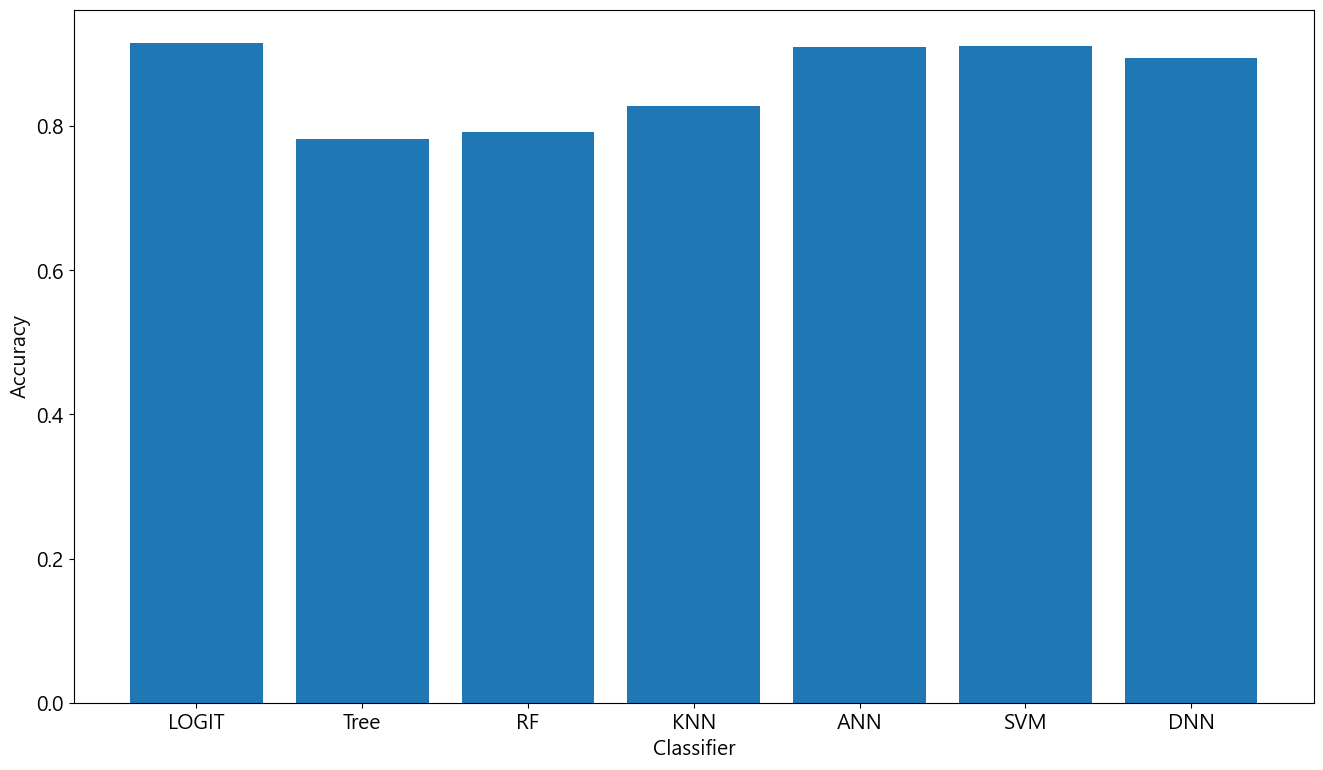

In [31]:
#알고리즘별 예측도 그래프
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]

scores_arr=np.array(scores) #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스

print(methods)
print(scores_arr)

print("최적의 모형:",methods[idx])
print("최고 정확도:",max_rate)        
 
plt.rcParams["font.size"]=15

plt.bar(methods, scores_arr)

plt.xlabel("Classifier")
plt.ylabel("Accuracy")